In [5]:
import pandas as pd

df = pd.read_csv("olympics_08_medalists.csv")
df.head(15)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acer Nethercott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Adam Korol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adam Kreek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Adam Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Adam Wheeler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bronze


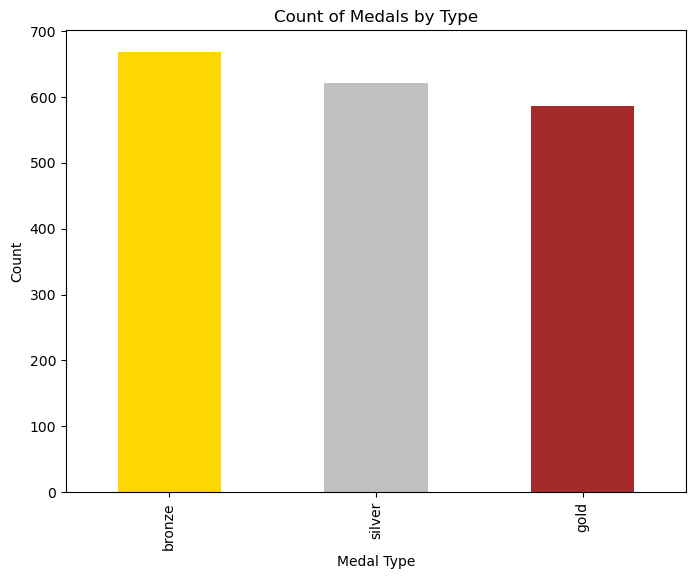

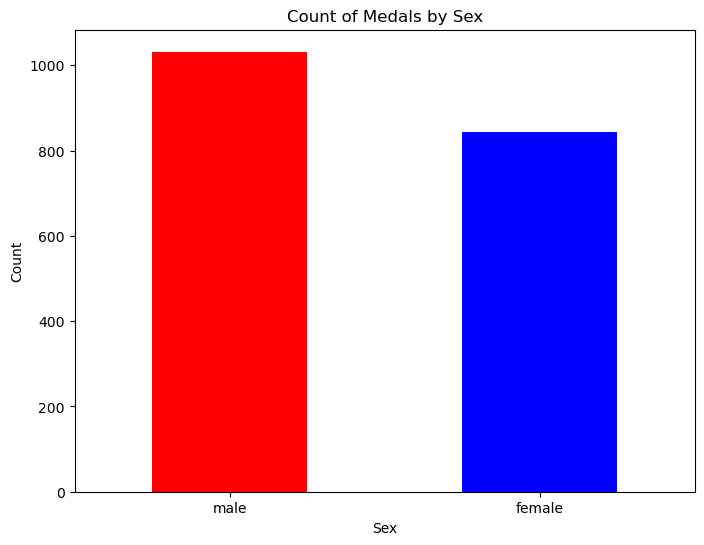

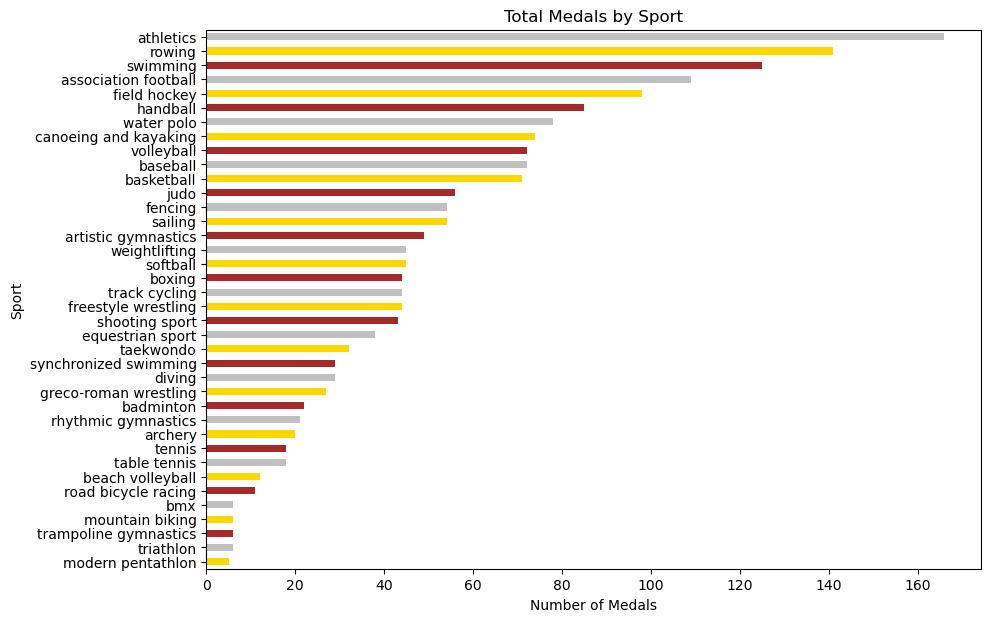

In [18]:
df_melted = df.melt(id_vars=['medalist_name'], 
                    var_name='sport', 
                    value_name='Medal')


# no value vars? 

df_melted = df_melted.dropna()

df_melted[['Sex', 'Sport']] = df_melted['sport'].str.split(pat = "_", expand = True)

df_melted = df_melted.drop(columns=['sport'])
#drop cols

df_melted.head(20)

# Each variable is in its own column.
# Each observation forms its own row.
# Each type of observational unit forms its own table. - seperate sports into columns 

# look up jupyter visualizations 


medal_counts = df_melted['Medal'].value_counts()

# Create a simple bar plot using pandas
medal_counts.plot(kind='bar', color=['gold', 'silver', 'brown'], figsize=(8, 6))
plt.title('Count of Medals by Type')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()


medal_counts2 = df_melted['Sex'].value_counts()

# Create a simple bar plot using pandas with valid color names
medal_counts2.plot(kind='bar', color=['red', 'blue'], figsize=(8, 6))  # Use hex color codes or color names

plt.title('Count of Medals by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Make the x-axis labels readable
plt.show()




# Count the medals by Sport and Sex
medals_by_sport_sex = df_melted.groupby(['Sport', 'Sex'])['Medal'].value_counts().unstack().fillna(0)

# Create a stacked bar chart
medals_by_sport = df_melted.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)

# Create a horizontal bar chart
medals_by_sport.sum(axis=1).sort_values().plot(kind='barh', color=['gold', 'silver', 'brown'], figsize=(10, 7))

# Plot formatting
plt.title('Total Medals by Sport')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()

